In [1]:
#!pip install geostatspy --user
#!pip install numba --user
#!pip install statsmodels --user

In [2]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python

import os                                               # to set current working directory 
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
%matplotlib inline
import matplotlib.pyplot as plt                         # plotting

# 1 Read facies images from Training dataset

In [3]:
import sys
# Code directory path
# 源代码路径：new_path = r'/home/users/suihong/1-Unconditional_Upload/'
new_path = 'H:/02Article/004MudDrapesModeling(WRR)/010MajorRevision/UnconditionalData/'
sys.path.append(new_path)
import dataset
import config

import tensorflow as tf
# Initialize TensorFlow session.
tf.InteractiveSession()

training_set = dataset.load_dataset(data_dir=config.data_dir, verbose=True, **config.dataset)

D:\Users\hx\Anaconda3\envs\Codes\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\hx\Anaconda3\envs\Codes\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\hx\Anaconda3\envs\Codes\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\hx\Anaconda3\envs\Codes\lib\site-packages\tensorflow\python\framework\dty

Streaming data using dataset.TFRecordDataset...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Instructions for updating:
Colocations handled automatically by placer.
Dataset shape = [1, 64, 64]
Dynamic range = [0, 255]


In [4]:
fm_no = 400
allimgs = training_set.get_minibatch_np(fm_no)  # real is the sampled training facies models, which is range 0-255.
allimgs_max = np.max(allimgs, axis = (2, 3), keepdims = True)
allimgs_min = np.min(allimgs, axis = (2, 3), keepdims = True)
allimgs = (allimgs - allimgs_min)/(allimgs_max - allimgs_min)

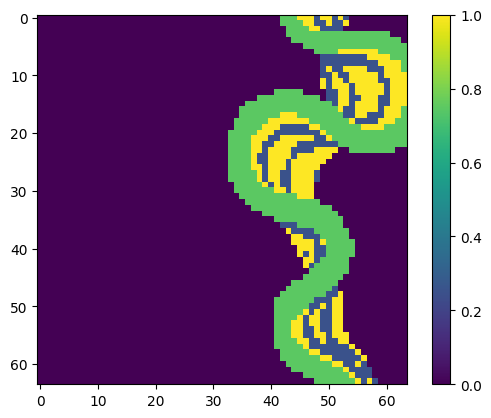

In [5]:
plt.imshow(allimgs[3,0])
plt.colorbar()

In [6]:
allimgs.shape

(400, 1, 64, 64)

In [7]:
x_t = np.linspace(0, 63, 64)
y_t = np.linspace(0, 63, 64)
y_co, x_co = np.meshgrid(x_t, y_t)

## 1.1 Floodplain in training data

In [8]:
var_num = 200
point_values = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values[:,0] = x_co.reshape(-1)
point_values[:,1] = y_co.reshape(-1)

tlrange = np.arange(allimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]

allimgs_BackgroundMudFacie = np.where(allimgs < 0.2, 1, 0)
point_values[:,2:] = np.transpose(allimgs_BackgroundMudFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

df_training_BackgroundMudFacie = pd.DataFrame(data=point_values, columns=colu_names)  

print(df_training_BackgroundMudFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df_training_BackgroundMudFacie.head()                                               # we could also use this command for a table preview
df_training_BackgroundMudFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  336  344  9  303  68  130  165  121  ...  323  45  71  1  389  143  \
0  0  0    1    1  1    1   1    1    1    1  ...    1   1   1  1    1    0   
1  0  1    1    1  1    1   1    1    1    1  ...    1   1   1  1    0    0   
2  0  2    1    1  1    1   1    1    1    1  ...    1   1   1  1    0    0   
3  0  3    1    1  1    1   1    1    1    1  ...    1   1   1  1    0    0   
4  0  4    1    1  1    1   0    1    1    1  ...    1   1   1  1    0    0   

   195  169  112  260  
0    1    1    1    1  
1    1    1    1    1  
2    1    1    1    0  
3    1    1    1    0  
4    1    1    1    0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
336,4096.0,0.812988,0.389969,0.0,1.00,1.0,1.00,1.0
344,4096.0,0.749756,0.433206,0.0,0.00,1.0,1.00,1.0
9,4096.0,0.754395,0.430498,0.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
143,4096.0,0.739746,0.438827,0.0,0.00,1.0,1.00,1.0
195,4096.0,0.669678,0.470387,0.0,0.00,1.0,1.00,1.0
169,4096.0,0.768311,0.421963,0.0,1.00,1.0,1.00,1.0
112,4096.0,0.780762,0.413781,0.0,1.00,1.0,1.00,1.0


## 1.2 Mud drapes in training data

In [9]:
point_values = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values[:,0] = x_co.reshape(-1)
point_values[:,1] = y_co.reshape(-1)

tlrange = np.arange(allimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]

allimgs_MuddyDrapesFacie = np.where(allimgs > 0.8, 1, 0)
point_values[:,2:] = np.transpose(allimgs_MuddyDrapesFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

df_training_MuddyDrapesFacie = pd.DataFrame(data=point_values, columns=colu_names)  

print(df_training_MuddyDrapesFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df_training_MuddyDrapesFacie.head()                                               # we could also use this command for a table preview
df_training_MuddyDrapesFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  244  202  367  108  204  334  50  39  ...  81  228  219  55  256  \
0  0  0    0    0    0    0    0    0   0   0  ...   0    0    0   0    1   
1  0  1    0    0    0    0    0    0   0   0  ...   0    0    0   0    1   
2  0  2    0    0    0    0    0    0   0   0  ...   0    0    0   0    1   
3  0  3    0    0    0    0    0    0   0   0  ...   0    0    0   0    0   
4  0  4    0    0    0    0    0    0   0   0  ...   0    0    0   0    0   

   182  293  152  62  349  
0    0    0    0   0    0  
1    0    0    0   0    0  
2    0    0    0   0    0  
3    0    0    0   0    0  
4    0    0    0   0    0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
244,4096.0,0.076904,0.266472,0.0,0.00,0.0,0.00,1.0
202,4096.0,0.054443,0.226918,0.0,0.00,0.0,0.00,1.0
367,4096.0,0.028320,0.165907,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
182,4096.0,0.064697,0.246021,0.0,0.00,0.0,0.00,1.0
293,4096.0,0.049805,0.217568,0.0,0.00,0.0,0.00,1.0
152,4096.0,0.034912,0.183580,0.0,0.00,0.0,0.00,1.0
62,4096.0,0.027832,0.164511,0.0,0.00,0.0,0.00,1.0


## 1.3 Point bar sand in training data 

In [10]:
point_values = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values[:,0] = x_co.reshape(-1)
point_values[:,1] = y_co.reshape(-1)

tlrange = np.arange(allimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]

allimgs_PointBarSandFacie = np.where((allimgs > 0.2)&(allimgs<0.5), 1, 0)
point_values[:,2:] = np.transpose(allimgs_PointBarSandFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

df_training_PointBarSandFacie = pd.DataFrame(data=point_values, columns=colu_names)  

print(df_training_PointBarSandFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df_training_PointBarSandFacie.head()                                               # we could also use this command for a table preview
df_training_PointBarSandFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  129  398  90  110  130  302  331  97  ...  343  399  49  206  310  \
0  0  0    0    0   0    0    0    0    0   0  ...    0    0   0    0    0   
1  0  1    0    0   0    0    0    0    0   0  ...    0    0   0    0    0   
2  0  2    0    0   0    0    0    0    0   0  ...    0    0   0    0    0   
3  0  3    0    0   0    0    0    0    0   0  ...    0    0   0    0    0   
4  0  4    0    0   0    0    0    0    0   0  ...    0    0   0    0    0   

   319  231  332  27  86  
0    0    0    0   0   0  
1    0    0    0   0   0  
2    0    0    0   0   0  
3    0    0    0   0   0  
4    0    0    0   0   0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
129,4096.0,0.049316,0.216554,0.0,0.00,0.0,0.00,1.0
398,4096.0,0.049072,0.216045,0.0,0.00,0.0,0.00,1.0
90,4096.0,0.034912,0.183580,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
319,4096.0,0.054443,0.226918,0.0,0.00,0.0,0.00,1.0
231,4096.0,0.028320,0.165907,0.0,0.00,0.0,0.00,1.0
332,4096.0,0.073486,0.260965,0.0,0.00,0.0,0.00,1.0
27,4096.0,0.051270,0.220574,0.0,0.00,0.0,0.00,1.0


## 1.4 Channel fill in training data

In [11]:
point_values = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values[:,0] = x_co.reshape(-1)
point_values[:,1] = y_co.reshape(-1)

tlrange = np.arange(allimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]

allimgs_ChannelSandFacie = np.where((allimgs > 0.5)&(allimgs<0.8), 1, 0)
point_values[:,2:] = np.transpose(allimgs_ChannelSandFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

df_training_ChannelSandFacie = pd.DataFrame(data=point_values, columns=colu_names)  

print(df_training_ChannelSandFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df_training_ChannelSandFacie.head()                                               # we could also use this command for a table preview
df_training_ChannelSandFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  47  151  361  214  229  391  185  149  ...  111  124  179  52  67  \
0  0  0   0    0    0    0    0    0    0    0  ...    0    0    0   0   1   
1  0  1   0    0    0    0    0    0    0    0  ...    0    0    0   0   1   
2  0  2   0    0    0    0    0    0    0    0  ...    0    0    0   0   1   
3  0  3   0    0    0    0    0    0    0    0  ...    0    0    0   0   1   
4  0  4   0    0    0    0    0    0    0    0  ...    0    0    0   0   1   

   310  385  196  323  222  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
47,4096.0,0.164795,0.371041,0.0,0.00,0.0,0.00,1.0
151,4096.0,0.167236,0.373232,0.0,0.00,0.0,0.00,1.0
361,4096.0,0.145508,0.352655,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
310,4096.0,0.168457,0.374317,0.0,0.00,0.0,0.00,1.0
385,4096.0,0.092041,0.289119,0.0,0.00,0.0,0.00,1.0
196,4096.0,0.150635,0.357736,0.0,0.00,0.0,0.00,1.0
323,4096.0,0.141357,0.348432,0.0,0.00,0.0,0.00,1.0


# 2 Read facies images generated from Trained GAN

In [12]:
network_dir = 'H:/02Article/004MudDrapesModeling(WRR)/010MajorRevision/UnconditionalData/Results/110-pgan-1gpu-yunjisuan/'
network_name = 'network-snapshot-006400.pkl'

In [13]:
import pickle

# Initialize TensorFlow session.
tf.InteractiveSession()

# Import networks.
with open(network_dir+network_name, 'rb') as file:
    G, D, Gs = pickle.load(file)
    
del G

D:\Users\hx\Anaconda3\envs\Codes\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [14]:
import config
import tfutil

resolution_x = 64
resolution_y = 64

latent_size_x = int(resolution_x/16)
latent_size_y = int(resolution_y/16)

Gs_enlarged = tfutil.Network('Gs_enlarged', num_channels=1, resolution_x = resolution_x, resolution_y = resolution_y, latent_size_x = latent_size_x,latent_size_y = latent_size_y, **config.G) #

In [15]:
print(Gs_enlarged.input_shapes)

[[Dimension(None), Dimension(8), Dimension(4), Dimension(4)]]


In [16]:
Gs_enlarged.copy_trainables_from(Gs)

In [17]:
del Gs

In [18]:
TotalReal_no = 400
Fakemodels_final = np.zeros(([1]+[TotalReal_no]+[resolution_x]+[resolution_y]), dtype=np.float32) # dimension = [35640, 8, 1, 64, 64]

for j in range(1):
    images_plt = np.zeros([TotalReal_no, 1, resolution_x, resolution_y])
    latents = np.random.RandomState(412).randn(TotalReal_no, 8, latent_size_x, latent_size_y)   #
    for i in range(int(TotalReal_no/1)):
        latents1 = latents[i*1:(i+1)*1]
        fakemodels = Gs_enlarged.run(latents1)
        fakemodels_max = np.max(fakemodels, axis = (2, 3), keepdims = True)
        fakemodels_min = np.min(fakemodels, axis = (2, 3), keepdims = True)
        fakemodels = (fakemodels - fakemodels_min)/(fakemodels_max - fakemodels_min)
        fakemodels = np.where(fakemodels<0.15, 0, fakemodels)
        fakemodels = np.where((fakemodels>= 0.15) & (fakemodels<0.50), 0.25, fakemodels)
        fakemodels = np.where((fakemodels>= 0.50) & (fakemodels<0.85), 0.75, fakemodels)
        fakemodels = np.where(fakemodels>= 0.85, 1, fakemodels)
        images_plt[i*1:(i+1)*1] = fakemodels

In [19]:
partimgs = np.array(images_plt,dtype=np.float32)
print(partimgs.shape)

(400, 1, 64, 64)


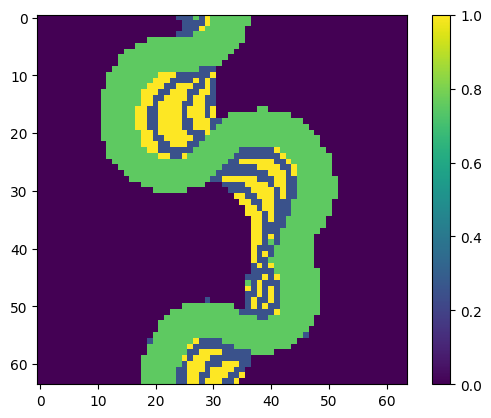

In [20]:
plt.imshow(images_plt[19,0])
plt.colorbar()

In [21]:
x_t = np.linspace(0, 63, 64)
y_t = np.linspace(0, 63, 64)
y_co, x_co = np.meshgrid(x_t, y_t)

# 2.1 Floodplain in GAN generated data

In [22]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(images_plt.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# images_plt = np.where(images_plt < 0.2, 0, images_plt)
images_plt_BackgroundMudFacie = np.where(images_plt < 0.2, 1, 0)
point_values_GAN[:,2:] = np.transpose(images_plt_BackgroundMudFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

ProGAN_df_BackgroundMudFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(ProGAN_df_BackgroundMudFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
ProGAN_df_BackgroundMudFacie.head()                                               # we could also use this command for a table preview
ProGAN_df_BackgroundMudFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  282  66  387  147  118  317  215  365  ...  105  339  6  234  60  \
0  0  0    1   1    1    1    1    0    1    1  ...    0    0  1    1   1   
1  0  1    1   1    1    1    1    0    1    1  ...    0    0  1    1   1   
2  0  2    1   1    1    1    1    0    1    1  ...    0    0  1    1   1   
3  0  3    1   0    1    1    1    0    1    1  ...    0    0  1    1   1   
4  0  4    1   0    1    1    1    0    1    1  ...    0    0  1    1   1   

   263  107  20  349  162  
0    1    1   1    1    1  
1    1    1   1    1    1  
2    1    1   1    1    1  
3    1    1   1    1    1  
4    1    1   1    1    1  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
282,4096.0,0.807617,0.394220,0.0,1.00,1.0,1.00,1.0
66,4096.0,0.784668,0.411103,0.0,1.00,1.0,1.00,1.0
387,4096.0,0.641113,0.479732,0.0,0.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
263,4096.0,0.629395,0.483026,0.0,0.00,1.0,1.00,1.0
107,4096.0,0.744385,0.436260,0.0,0.00,1.0,1.00,1.0
20,4096.0,0.749756,0.433206,0.0,0.00,1.0,1.00,1.0
349,4096.0,0.575928,0.494262,0.0,0.00,1.0,1.00,1.0


## 2.2 Mud drapes in GAN generated data

In [23]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(images_plt.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# images_plt = np.where(images_plt < 0.2, 0, images_plt)
images_MuddyDrapesFacie = np.where(images_plt > 0.8, 1, 0)
point_values_GAN[:,2:] = np.transpose(images_MuddyDrapesFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

ProGAN_df_MuddyDrapesFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(ProGAN_df_MuddyDrapesFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
ProGAN_df_MuddyDrapesFacie.head()                                               # we could also use this command for a table preview
ProGAN_df_MuddyDrapesFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  96  40  165  391  394  370  373  101  ...  277  375  390  329  306  \
0  0  0   0   0    0    0    0    0    0    0  ...    0    0    0    0    0   
1  0  1   0   0    0    0    0    0    0    0  ...    0    0    0    0    0   
2  0  2   0   0    0    0    0    0    0    0  ...    0    0    0    0    0   
3  0  3   0   0    0    0    0    0    0    0  ...    0    0    0    0    0   
4  0  4   0   0    0    0    0    0    1    0  ...    0    0    0    0    0   

   244  79  347  128  120  
0    0   0    0    0    0  
1    0   0    0    0    0  
2    0   0    0    0    0  
3    0   0    0    0    0  
4    0   0    0    0    0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
96,4096.0,0.045898,0.209290,0.0,0.00,0.0,0.00,1.0
40,4096.0,0.077148,0.266859,0.0,0.00,0.0,0.00,1.0
165,4096.0,0.083496,0.276664,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
244,4096.0,0.067139,0.250293,0.0,0.00,0.0,0.00,1.0
79,4096.0,0.078369,0.268784,0.0,0.00,0.0,0.00,1.0
347,4096.0,0.072998,0.260165,0.0,0.00,0.0,0.00,1.0
128,4096.0,0.089844,0.285993,0.0,0.00,0.0,0.00,1.0


## 2.3 Point bar sand in GAN generated data 

In [24]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(images_plt.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# images_plt = np.where(images_plt < 0.2, 0, images_plt)
images_PointBarSandFacie = np.where((images_plt > 0.2)&(images_plt<0.5), 1, 0)
point_values_GAN[:,2:] = np.transpose(images_PointBarSandFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

ProGAN_df_PointBarSandFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(ProGAN_df_PointBarSandFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
ProGAN_df_PointBarSandFacie.head()                                               # we could also use this command for a table preview
ProGAN_df_PointBarSandFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  316  286  378  55  46  240  238  56  ...  42  101  257  33  146  6  \
0  0  0    1    0    0   0   0    0    0   0  ...   0    0    0   0    0  0   
1  0  1    0    0    0   0   0    0    0   0  ...   0    0    0   0    0  0   
2  0  2    0    0    0   0   0    0    0   0  ...   0    0    0   0    0  0   
3  0  3    0    0    0   0   0    0    0   0  ...   0    0    0   0    0  0   
4  0  4    0    0    0   0   0    0    0   0  ...   0    0    0   0    0  0   

   204  314  292  60  
0    0    0    0   0  
1    0    0    0   0  
2    0    0    0   0  
3    0    0    0   0  
4    0    0    0   0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
316,4096.0,0.089111,0.284939,0.0,0.00,0.0,0.00,1.0
286,4096.0,0.081787,0.274074,0.0,0.00,0.0,0.00,1.0
378,4096.0,0.096436,0.295224,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
6,4096.0,0.093506,0.291176,0.0,0.00,0.0,0.00,1.0
204,4096.0,0.040283,0.196647,0.0,0.00,0.0,0.00,1.0
314,4096.0,0.062744,0.242532,0.0,0.00,0.0,0.00,1.0
292,4096.0,0.067871,0.251555,0.0,0.00,0.0,0.00,1.0


## 2.4 Channel fill in GAN generated data

In [25]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(images_plt.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# images_plt = np.where(images_plt < 0.2, 0, images_plt)
images_ChannelSandFacie = np.where((images_plt > 0.5)&(images_plt<0.8), 1, 0)
point_values_GAN[:,2:] = np.transpose(images_ChannelSandFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

ProGAN_df_ChannelSandFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(ProGAN_df_ChannelSandFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
ProGAN_df_ChannelSandFacie.head()                                               # we could also use this command for a table preview
ProGAN_df_ChannelSandFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  124  288  86  62  284  121  176  233  ...  211  125  386  350  394  \
0  0  0    0    1   0   0    0    0    0    0  ...    0    0    0    0    0   
1  0  1    0    0   0   0    0    0    0    0  ...    0    0    0    0    0   
2  0  2    0    0   0   0    0    0    0    0  ...    0    0    0    0    0   
3  0  3    0    0   0   0    0    0    0    0  ...    0    0    0    0    0   
4  0  4    0    0   0   0    0    0    0    0  ...    0    0    0    0    0   

   280  301  138  234  328  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
124,4096.0,0.188232,0.390945,0.0,0.00,0.0,0.00,1.0
288,4096.0,0.113770,0.317570,0.0,0.00,0.0,0.00,1.0
86,4096.0,0.145020,0.352164,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
280,4096.0,0.096191,0.294890,0.0,0.00,0.0,0.00,1.0
301,4096.0,0.146729,0.353878,0.0,0.00,0.0,0.00,1.0
138,4096.0,0.181641,0.385595,0.0,0.00,0.0,0.00,1.0
234,4096.0,0.179443,0.383770,0.0,0.00,0.0,0.00,1.0


# 3 Read facies images generated from MPS

In [26]:
partimgs = np.load('H:/02Article/004MudDrapesModeling(WRR)/010MajorRevision/图件/010VariogramModels/DeeSseOutput.npy')
partimgs = partimgs/4

In [27]:
partimgs[0]

array([[[0.  , 0.  , 0.  , ..., 0.75, 0.75, 0.75],
        [0.  , 0.  , 0.  , ..., 0.75, 0.75, 0.75],
        [0.  , 0.  , 0.  , ..., 0.75, 0.75, 0.75],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]])

In [28]:
partimgs.shape

(500, 1, 64, 64)

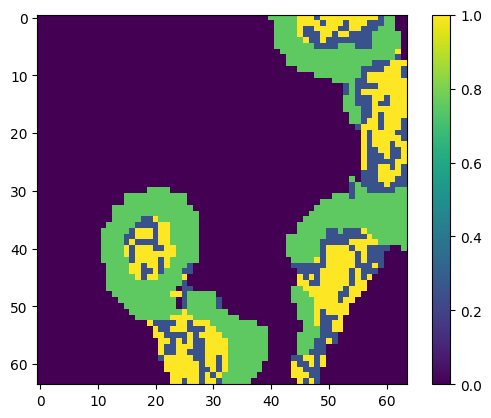

In [29]:
plt.imshow(partimgs[200,0])
plt.colorbar()

In [30]:
partimgs1 = []
for k in range(partimgs.shape[0]):
    print(np.sum(partimgs[k]))
    if np.sum(partimgs[k]) > 300:
        # partimgs1 = np.delete(partimgs,k,0); 
        partimgs1.append(partimgs[k])

811.0
472.5
611.25
836.25
574.5
700.75
312.0
690.25
691.75
646.0
301.5
634.75
593.25
804.75
1112.0
734.75
758.5
918.25
593.25
694.0
1092.0
806.0
957.0
1527.0
1278.5
44.25
939.5
873.25
591.0
780.75
737.0
688.75
826.5
694.25
574.0
137.5
637.25
869.25
942.0
325.0
1047.5
902.75
1020.25
771.5
1285.75
518.75
275.0
754.25
479.25
701.25
495.5
412.25
1026.5
408.25
296.0
909.5
713.0
190.5
385.25
735.5
562.0
470.75
104.0
754.0
409.75
657.75
1235.5
816.0
808.5
537.25
302.75
710.75
834.25
172.75
594.0
660.75
896.5
1173.0
798.5
577.0
613.75
983.5
711.5
1335.5
794.5
954.5
578.0
681.0
741.25
805.75
1104.5
905.25
547.5
630.25
618.5
146.0
681.25
504.75
576.75
762.5
540.5
689.25
822.25
766.0
868.25
591.75
831.75
118.0
1057.0
917.5
574.75
816.75
650.75
571.0
1062.0
258.25
985.75
885.75
652.5
624.25
375.75
974.25
829.5
499.5
514.75
864.5
699.5
946.75
1064.75
82.75
820.75
852.25
842.0
703.0
780.0
698.5
778.25
824.5
774.5
1241.25
752.75
642.5
704.0
615.25
319.0
485.25
423.5
1009.5
644.25
627.0
547.5
568.75
6

In [31]:
partimgs = np.array(partimgs1,dtype=np.float32)
print(partimgs.shape)

(471, 1, 64, 64)


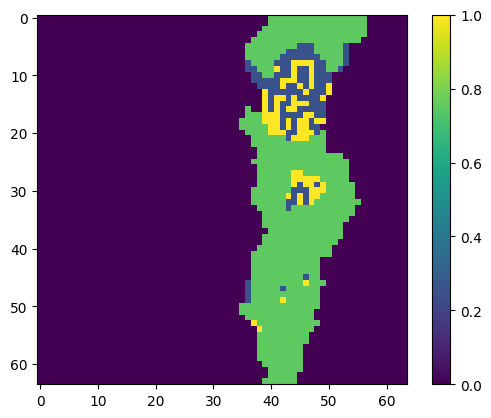

In [32]:
plt.imshow(partimgs[2,0])
plt.colorbar()

In [33]:
x_t = np.linspace(0, 63, 64)
y_t = np.linspace(0, 63, 64)
y_co, x_co = np.meshgrid(x_t, y_t)

# 3.1 Floodplain in MPS generated data

In [34]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(partimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# partimgs = np.where(partimgs < 0.2, 0, partimgs)
partimgs_BackgroundMudFacie = np.where(partimgs < 0.2, 1, 0)
point_values_GAN[:,2:] = np.transpose(partimgs_BackgroundMudFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

TraGAN_df_BackgroundMudFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(TraGAN_df_BackgroundMudFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
TraGAN_df_BackgroundMudFacie.head()                                               # we could also use this command for a table preview
TraGAN_df_BackgroundMudFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  153  468  270  16  294  296  102  250  ...  138  145  27  205  312  \
0  0  0    0    1    1   1    1    0    1    1  ...    1    0   1    1    0   
1  0  1    1    1    1   1    1    0    1    1  ...    1    0   1    1    0   
2  0  2    1    1    1   1    1    0    1    1  ...    1    0   1    1    0   
3  0  3    1    1    1   1    1    1    1    1  ...    1    0   1    0    1   
4  0  4    1    1    1   1    1    1    1    1  ...    1    0   1    0    1   

   282  334  94  311  239  
0    0    0   1    1    1  
1    0    0   1    1    1  
2    0    0   1    1    1  
3    0    0   1    1    1  
4    0    0   1    1    1  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
153,4096.0,0.872314,0.333780,0.0,1.00,1.0,1.00,1.0
468,4096.0,0.780518,0.413947,0.0,1.00,1.0,1.00,1.0
270,4096.0,0.853760,0.353390,0.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
282,4096.0,0.674072,0.468778,0.0,0.00,1.0,1.00,1.0
334,4096.0,0.592529,0.491424,0.0,0.00,1.0,1.00,1.0
94,4096.0,0.700439,0.458121,0.0,0.00,1.0,1.00,1.0
311,4096.0,0.766357,0.423199,0.0,1.00,1.0,1.00,1.0


## 3.2 Mud drapes in MPS generated data

In [35]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(partimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# partimgs = np.where(partimgs < 0.2, 0, partimgs)
partimgs_MuddyDrapesFacie = np.where((partimgs > 0.2)&(partimgs < 0.5), 1, 0)
point_values_GAN[:,2:] = np.transpose(partimgs_MuddyDrapesFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

TraGAN_df_MuddyDrapesFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(TraGAN_df_MuddyDrapesFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
TraGAN_df_MuddyDrapesFacie.head()                                               # we could also use this command for a table preview
TraGAN_df_MuddyDrapesFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  129  174  38  5  143  250  225  193  ...  404  293  215  54  89  339  \
0  0  0    0    0   0  0    0    0    0    0  ...    0    0    0   0   0    0   
1  0  1    0    0   0  0    0    0    0    0  ...    0    0    0   0   0    0   
2  0  2    0    0   0  0    0    0    0    0  ...    0    0    1   0   0    0   
3  0  3    0    0   0  0    0    0    0    0  ...    0    0    0   0   0    0   
4  0  4    0    0   0  0    0    0    0    0  ...    0    0    0   0   0    0   

   91  96  182  71  
0   0   0    0   0  
1   0   0    0   0  
2   0   0    0   0  
3   0   0    0   0  
4   0   0    0   0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
129,4096.0,0.059326,0.236263,0.0,0.00,0.0,0.00,1.0
174,4096.0,0.046143,0.209819,0.0,0.00,0.0,0.00,1.0
38,4096.0,0.078613,0.269167,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
339,4096.0,0.047363,0.212441,0.0,0.00,0.0,0.00,1.0
91,4096.0,0.051758,0.221565,0.0,0.00,0.0,0.00,1.0
96,4096.0,0.094727,0.292873,0.0,0.00,0.0,0.00,1.0
182,4096.0,0.059570,0.236718,0.0,0.00,0.0,0.00,1.0


## 3.3 Point bar sand in MPS generated data 

In [36]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(partimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# partimgs = np.where(partimgs < 0.2, 0, partimgs)
partimgs_PointBarSandFacie = np.where(partimgs > 0.8, 1, 0)
point_values_GAN[:,2:] = np.transpose(partimgs_PointBarSandFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

TraGAN_df_PointBarSandFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(TraGAN_df_PointBarSandFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
TraGAN_df_PointBarSandFacie.head()                                               # we could also use this command for a table preview
TraGAN_df_PointBarSandFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  220  395  67  301  169  210  122  466  ...  228  289  352  389  185  \
0  0  0    0    0   0    0    0    0    0    0  ...    0    0    0    0    0   
1  0  1    0    0   1    0    0    0    0    0  ...    0    0    0    0    0   
2  0  2    0    0   0    0    0    0    0    0  ...    0    0    0    0    0   
3  0  3    1    0   1    0    0    0    0    0  ...    0    0    0    0    0   
4  0  4    1    0   0    0    0    0    0    0  ...    0    0    0    0    0   

   8  281  227  258  91  
0  0    0    0    0   0  
1  0    0    0    0   0  
2  0    0    0    0   0  
3  0    0    0    0   0  
4  0    0    0    0   0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
220,4096.0,0.083252,0.276296,0.0,0.00,0.0,0.00,1.0
395,4096.0,0.082520,0.275188,0.0,0.00,0.0,0.00,1.0
67,4096.0,0.056152,0.230244,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
8,4096.0,0.041504,0.199477,0.0,0.00,0.0,0.00,1.0
281,4096.0,0.034912,0.183580,0.0,0.00,0.0,0.00,1.0
227,4096.0,0.028564,0.166599,0.0,0.00,0.0,0.00,1.0
258,4096.0,0.073730,0.261364,0.0,0.00,0.0,0.00,1.0


## 3.4 Channel fill in MPS generated data

In [37]:
point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values_GAN[:,0] = x_co.reshape(-1)
point_values_GAN[:,1] = y_co.reshape(-1)

tlrange = np.arange(partimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]
    
# partimgs = np.where(partimgs < 0.2, 0, partimgs)
partimgs_ChannelSandFacie = np.where((partimgs > 0.5)&(partimgs < 0.8), 1, 0)
point_values_GAN[:,2:] = np.transpose(partimgs_ChannelSandFacie[random_img_index].reshape(var_num, -1), (1, 0))
colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

TraGAN_df_ChannelSandFacie = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

print(TraGAN_df_ChannelSandFacie.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
TraGAN_df_ChannelSandFacie.head()                                               # we could also use this command for a table preview
TraGAN_df_ChannelSandFacie.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  465  201  365  308  462  429  356  413  ...  347  196  332  420  467  \
0  0  0    0    0    0    0    0    1    0    0  ...    0    0    0    0    0   
1  0  1    0    0    0    0    0    1    0    0  ...    0    0    0    0    0   
2  0  2    0    0    0    0    0    1    1    0  ...    0    0    0    0    0   
3  0  3    0    0    0    0    0    0    1    0  ...    0    0    0    0    0   
4  0  4    0    0    0    0    0    0    1    0  ...    0    0    0    0    0   

   53  135  29  67  30  
0   0    1   0   0   0  
1   0    1   0   0   0  
2   0    1   0   0   0  
3   0    1   0   0   0  
4   0    0   0   0   0  

[5 rows x 202 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
465,4096.0,0.161865,0.368372,0.0,0.00,0.0,0.00,1.0
201,4096.0,0.106934,0.309067,0.0,0.00,0.0,0.00,1.0
365,4096.0,0.177246,0.381923,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
53,4096.0,0.095703,0.294220,0.0,0.00,0.0,0.00,1.0
135,4096.0,0.101318,0.301787,0.0,0.00,0.0,0.00,1.0
29,4096.0,0.170166,0.375824,0.0,0.00,0.0,0.00,1.0
67,4096.0,0.099854,0.299841,0.0,0.00,0.0,0.00,1.0


# 4 Plot Variograms

## 4.1 Normalize df data 

In [38]:
def norm(df):
    for col in df.columns:
        if col == 'X' or col == "Y": continue
        df[col], tv, tns = geostats.nscore(df, col)
        
    return df

In [39]:
df_training_ns_BackgroundMudFacie = df_training_BackgroundMudFacie.copy()
df_training_ns_BackgroundMudFacie = norm(df_training_ns_BackgroundMudFacie)
df_training_ns_BackgroundMudFacie.head() 
df_training_ns_MuddyDrapesFacie = df_training_MuddyDrapesFacie.copy()
df_training_ns_MuddyDrapesFacie = norm(df_training_ns_MuddyDrapesFacie)
df_training_ns_MuddyDrapesFacie.head()  
df_training_ns_PointBarSandFacie = df_training_PointBarSandFacie.copy()
df_training_ns_PointBarSandFacie = norm(df_training_ns_PointBarSandFacie)
df_training_ns_PointBarSandFacie.head()  
df_training_ns_ChannelSandFacie = df_training_ChannelSandFacie.copy()
df_training_ns_ChannelSandFacie = norm(df_training_ns_ChannelSandFacie)
df_training_ns_ChannelSandFacie.head()  

,X,Y,47,151,361,214,229,391,185,149,...,111,124,179,52,67,310,385,196,323,222
0,0,0,0.974448,0.964657,1.055362,0.911446,1.26517,1.411969,0.843978,1.19727,...,1.238377,1.02075,1.194768,0.956889,3.522738,0.959795,1.327552,1.033193,1.073696,1.096854
1,0,1,0.974448,0.964657,1.055362,0.911446,1.26517,1.411969,0.843978,1.19727,...,1.238377,1.02075,1.194768,0.956889,3.522738,0.959795,1.327552,1.033193,1.073696,1.096854
2,0,2,0.974448,0.964657,1.055362,0.911446,1.26517,1.411969,0.843978,1.19727,...,1.238377,1.02075,1.194768,0.956889,3.522738,0.959795,1.327552,1.033193,1.073696,1.096854
3,0,3,0.974448,0.964657,1.055362,0.911446,1.26517,1.411969,0.843978,1.19727,...,1.238377,1.02075,1.194768,0.956889,3.522738,0.959795,1.327552,1.033193,1.073696,1.096854
4,0,4,0.974448,0.964657,1.055362,0.911446,1.26517,1.411969,0.843978,1.19727,...,1.238377,1.02075,1.194768,0.956889,3.522738,0.959795,1.327552,1.033193,1.073696,1.096854


In [40]:
ProGAN_df_ns_BackgroundMudFacie = ProGAN_df_BackgroundMudFacie.copy()
ProGAN_df_ns_BackgroundMudFacie = norm(ProGAN_df_ns_BackgroundMudFacie)
ProGAN_df_ns_BackgroundMudFacie.head()
ProGAN_df_ns_MuddyDrapesFacie = ProGAN_df_MuddyDrapesFacie.copy()
ProGAN_df_ns_MuddyDrapesFacie = norm(ProGAN_df_ns_MuddyDrapesFacie)
ProGAN_df_ns_MuddyDrapesFacie.head()
ProGAN_df_ns_PointBarSandFacie = ProGAN_df_PointBarSandFacie.copy()
ProGAN_df_ns_PointBarSandFacie = norm(ProGAN_df_ns_PointBarSandFacie)
ProGAN_df_ns_PointBarSandFacie.head()
ProGAN_df_ns_ChannelSandFacie = ProGAN_df_ChannelSandFacie.copy()
ProGAN_df_ns_ChannelSandFacie = norm(ProGAN_df_ns_ChannelSandFacie)
ProGAN_df_ns_ChannelSandFacie.head()

,X,Y,124,288,86,62,284,121,176,233,...,211,125,386,350,394,280,301,138,234,328
0,0,0,0.883976,3.522738,1.057501,1.097972,0.989314,1.239696,1.146208,1.104706,...,1.356158,1.118326,1.090178,0.968562,0.942479,1.302847,1.050037,0.908668,0.917022,0.909593
1,0,1,0.883976,1.206089,1.057501,1.097972,0.989314,1.239696,1.146208,1.104706,...,1.356158,1.118326,1.090178,0.968562,0.942479,1.302847,1.050037,0.908668,0.917022,0.909593
2,0,2,0.883976,1.206089,1.057501,1.097972,0.989314,1.239696,1.146208,1.104706,...,1.356158,1.118326,1.090178,0.968562,0.942479,1.302847,1.050037,0.908668,0.917022,0.909593
3,0,3,0.883976,1.206089,1.057501,1.097972,0.989314,1.239696,1.146208,1.104706,...,1.356158,1.118326,1.090178,0.968562,0.942479,1.302847,1.050037,0.908668,0.917022,0.909593
4,0,4,0.883976,1.206089,1.057501,1.097972,0.989314,1.239696,1.146208,1.104706,...,1.356158,1.118326,1.090178,0.968562,0.942479,1.302847,1.050037,0.908668,0.917022,0.909593


In [41]:
TraGAN_df_ns_BackgroundMudFacie = TraGAN_df_BackgroundMudFacie.copy()
TraGAN_df_ns_BackgroundMudFacie = norm(TraGAN_df_ns_BackgroundMudFacie)
TraGAN_df_ns_BackgroundMudFacie.head()
TraGAN_df_ns_MuddyDrapesFacie = TraGAN_df_MuddyDrapesFacie.copy()
TraGAN_df_ns_MuddyDrapesFacie = norm(TraGAN_df_ns_MuddyDrapesFacie)
TraGAN_df_ns_MuddyDrapesFacie.head()
TraGAN_df_ns_PointBarSandFacie = TraGAN_df_PointBarSandFacie.copy()
TraGAN_df_ns_PointBarSandFacie = norm(TraGAN_df_ns_PointBarSandFacie)
TraGAN_df_ns_PointBarSandFacie.head()
TraGAN_df_ns_ChannelSandFacie = TraGAN_df_ChannelSandFacie.copy()
TraGAN_df_ns_ChannelSandFacie = norm(TraGAN_df_ns_ChannelSandFacie)
TraGAN_df_ns_ChannelSandFacie.head()

,X,Y,465,201,365,308,462,429,356,413,...,347,196,332,420,467,53,135,29,67,30
0,0,0,0.986323,1.242339,0.925441,0.927321,1.317282,3.522738,0.754683,0.517602,...,0.924503,1.043686,1.037376,1.266533,0.989314,1.305712,3.522738,0.953027,1.281691,1.101333
1,0,1,0.986323,1.242339,0.925441,0.927321,1.317282,3.522738,0.754683,0.517602,...,0.924503,1.043686,1.037376,1.266533,0.989314,1.305712,3.522738,0.953027,1.281691,1.101333
2,0,2,0.986323,1.242339,0.925441,0.927321,1.317282,3.522738,3.522738,0.517602,...,0.924503,1.043686,1.037376,1.266533,0.989314,1.305712,3.522738,0.953027,1.281691,1.101333
3,0,3,0.986323,1.242339,0.925441,0.927321,1.317282,0.840488,3.522738,0.517602,...,0.924503,1.043686,1.037376,1.266533,0.989314,1.305712,3.522738,0.953027,1.281691,1.101333
4,0,4,0.986323,1.242339,0.925441,0.927321,1.317282,0.840488,3.522738,0.517602,...,0.924503,1.043686,1.037376,1.266533,0.989314,1.305712,1.273387,0.953027,1.281691,1.101333


## 4.2 Calculate Variogram and plotting

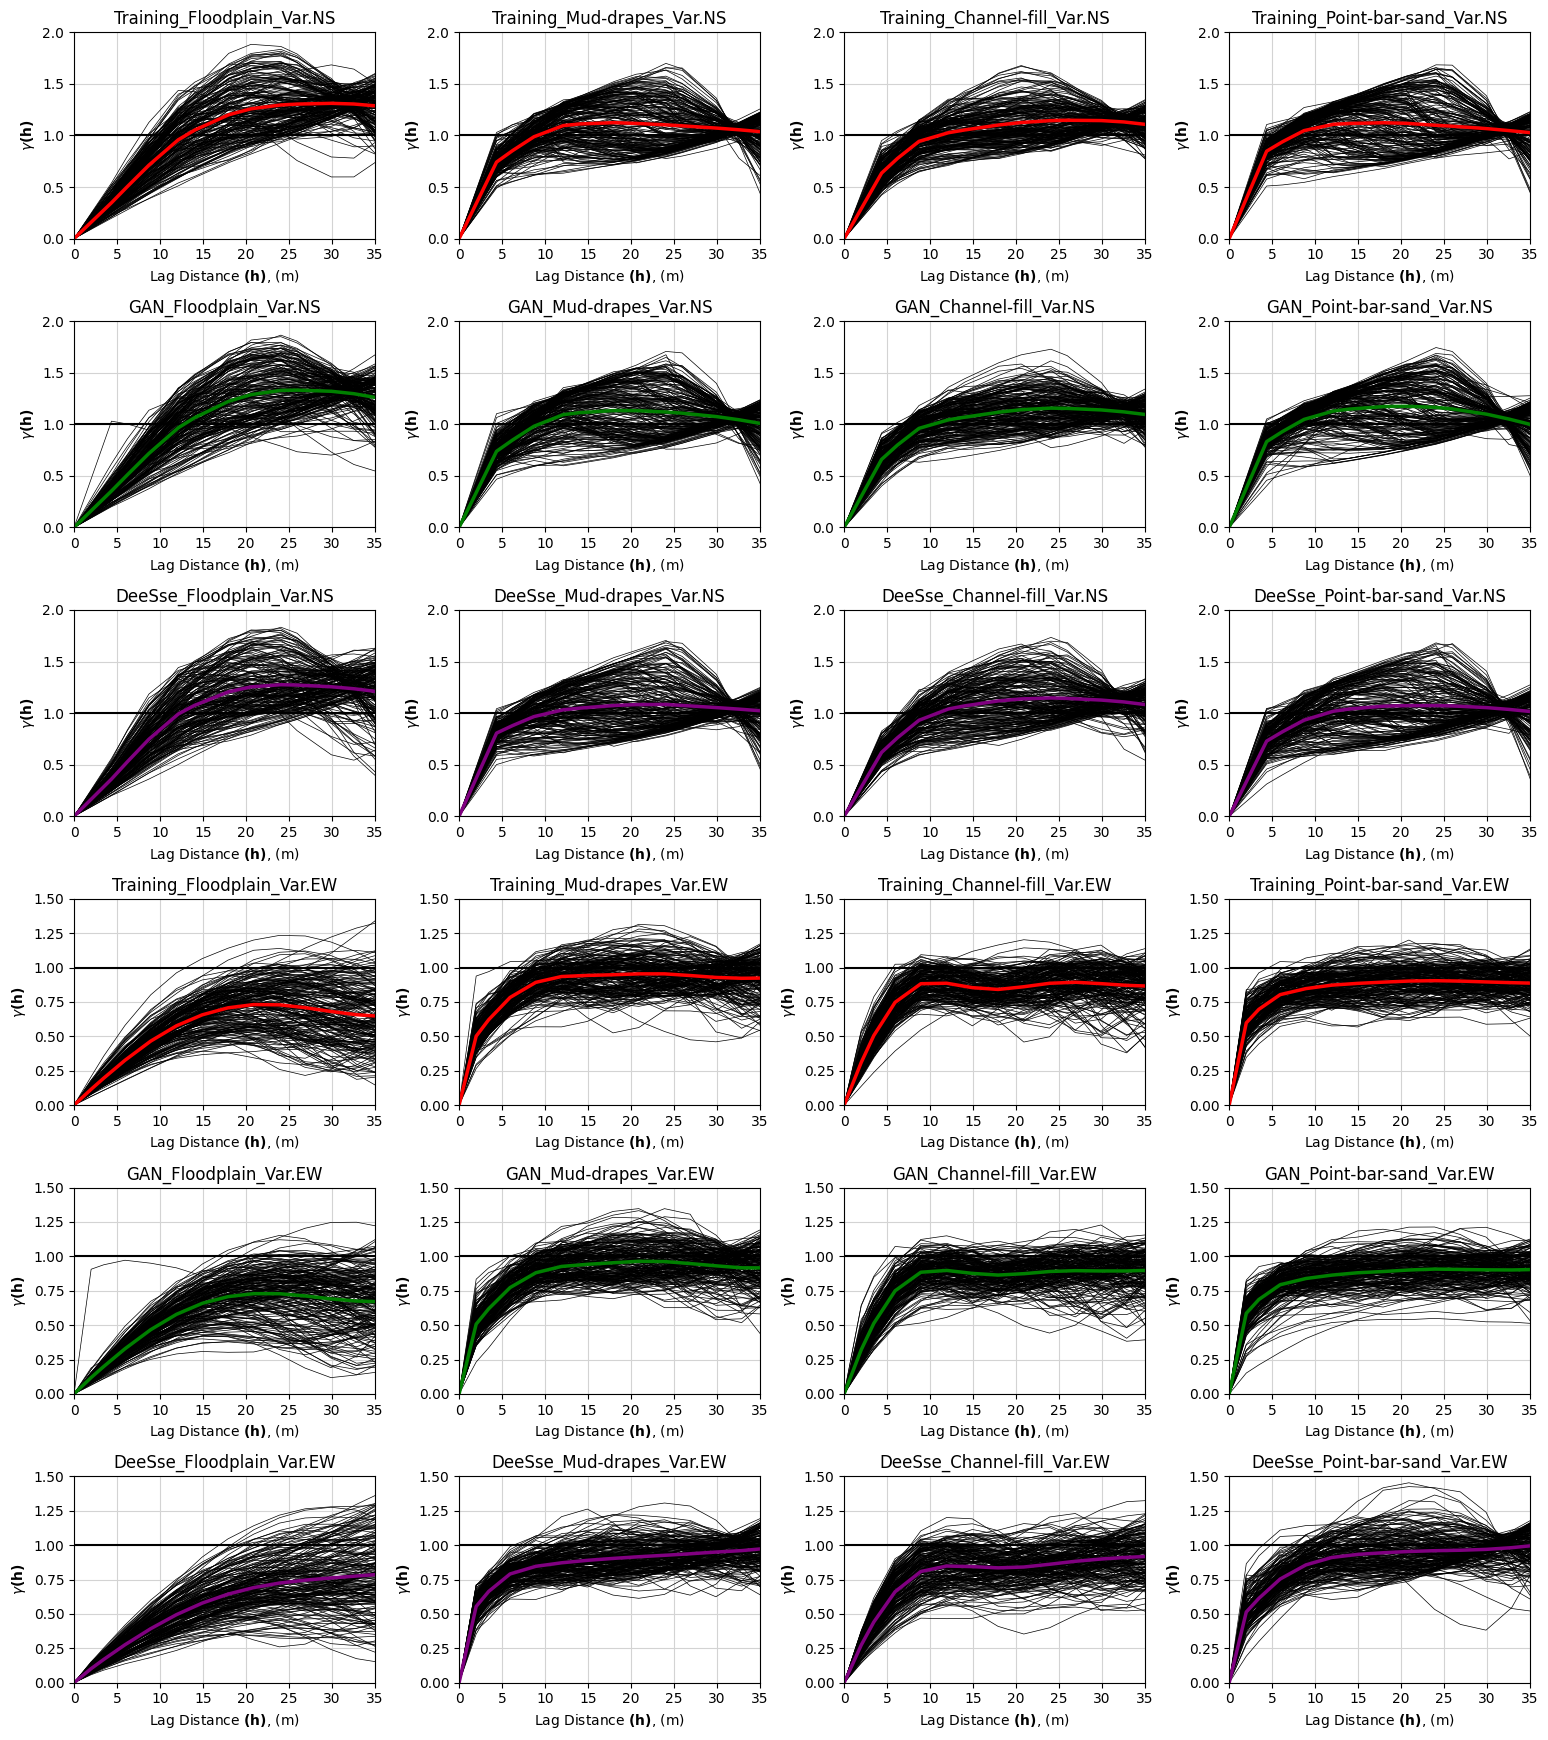

In [50]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(15.5, 17.5, forward=True)

tmin = -9999.; tmax = 9999.
lag_dist = 3.0; lag_tol = 3.0; nlag = 20;
bandh = 3.0; atol = 45
isill = 1                                               # standardize sill 
azi_mat = [0,90]           # directions in azimuth to consider

# Training data background facies in direction 0
df = df_training_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(6,4,1)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Floodplain_Var.NS')
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')

# Training data muddy drapes facie in direction 0
df = df_training_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(6,4,2)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Mud-drapes_Var.NS')  
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')

# Training data channel fill facie in direction 0
df = df_training_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(6,4,3)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Channel-fill_Var.NS')  
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')

# Training data point bar sand facie in direction 0
df = df_training_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(6,4,4)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Point-bar-sand_Var.NS')  
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')


# GAN generated data background facie in direction 0
df = ProGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,5)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Floodplain_Var.NS')   
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')    
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')

# GAN generated data muddy drapes facie in direction 0
df = ProGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,6)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Mud-drapes_Var.NS')   
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')    
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')

# GAN generated data channel sand facie in direction 0
df = ProGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,7)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Channel-fill_Var.NS') 
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')    
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')

# GAN generated data point bar sand facie in direction 0
df = ProGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,8)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Point-bar-sand_Var.NS')  
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')    
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')



# MPS generated data background facies in direction 0
df = TraGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,9)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Floodplain_Var.NS')
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black') 
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')

# MPS generated data muddy drapes facie in direction 0
df = TraGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,10)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Mud-drapes_Var.NS')
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black') 
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')

# MPS generated data channel sand facie facies in direction 0
df = TraGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,11)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Channel-fill_Var.NS')  
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black') 
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')

# MPS generated data Point bar sand facies in direction 0
df = TraGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,12)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Point-bar-sand_Var.NS') 
plt.xlim([0,35])
plt.ylim([0,2.0])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black') 
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')


# Training data background facies in direction 90
df = df_training_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(6,4,13)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Floodplain_Var.EW') 
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')

# Training data muddy drapes facies in direction 90
df = df_training_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(6,4,14)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Mud-drapes_Var.EW') 
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')

# Training data channel sand facies in direction 90
df = df_training_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(6,4,15)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Channel-fill_Var.EW') 
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')

# Training data piont bar sand facies in direction 90
df = df_training_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(6,4,16)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Training_Point-bar-sand_Var.EW') 
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')   
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')


# GAN generated data background facie in direction 90
df = ProGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,17)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Floodplain_Var.EW')  
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')

# GAN generated data muddy drapes facie in direction 90
df = ProGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,18)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Mud-drapes_Var.EW')   
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')

# GAN generated data channel sand facie in direction 90
df = ProGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,19)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Channel-fill_Var.EW')  
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')

# GAN generated data point bar sand facie in direction 90
df = ProGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,20)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('GAN_Point-bar-sand_Var.EW') 
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green')


# MPS generated data background facies in direction 90
df = TraGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,21)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Floodplain_Var.EW')  
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')

# MPS generated data muddy drapes facie in direction 90
df = TraGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,22)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Mud-drapes_Var.EW')   
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')

# MPS generated data channel sand facie in direction 90
df = TraGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,23)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Channel-fill_Var.EW')   
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')

# MPS generated data point bar sand facie in direction 90
df = TraGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(6,4,24)
plt.plot([0,100],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('DeeSse_Point-bar-sand_Var.EW')   
plt.xlim([0,35])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
    plt.plot(lag[img, 0,:-1],gamma[img, 0,:-1], linestyle='solid',linewidth=0.5,color = 'black')
plt.plot(lag[img, 0,:-1],np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple')



plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.28, hspace=0.40)

plt.savefig('H:/02Article/004MudDrapesModeling(WRR)/010MajorRevision/图件/010VariogramModels/UnconditioanlMDS_plot.svg' , dpi=300)

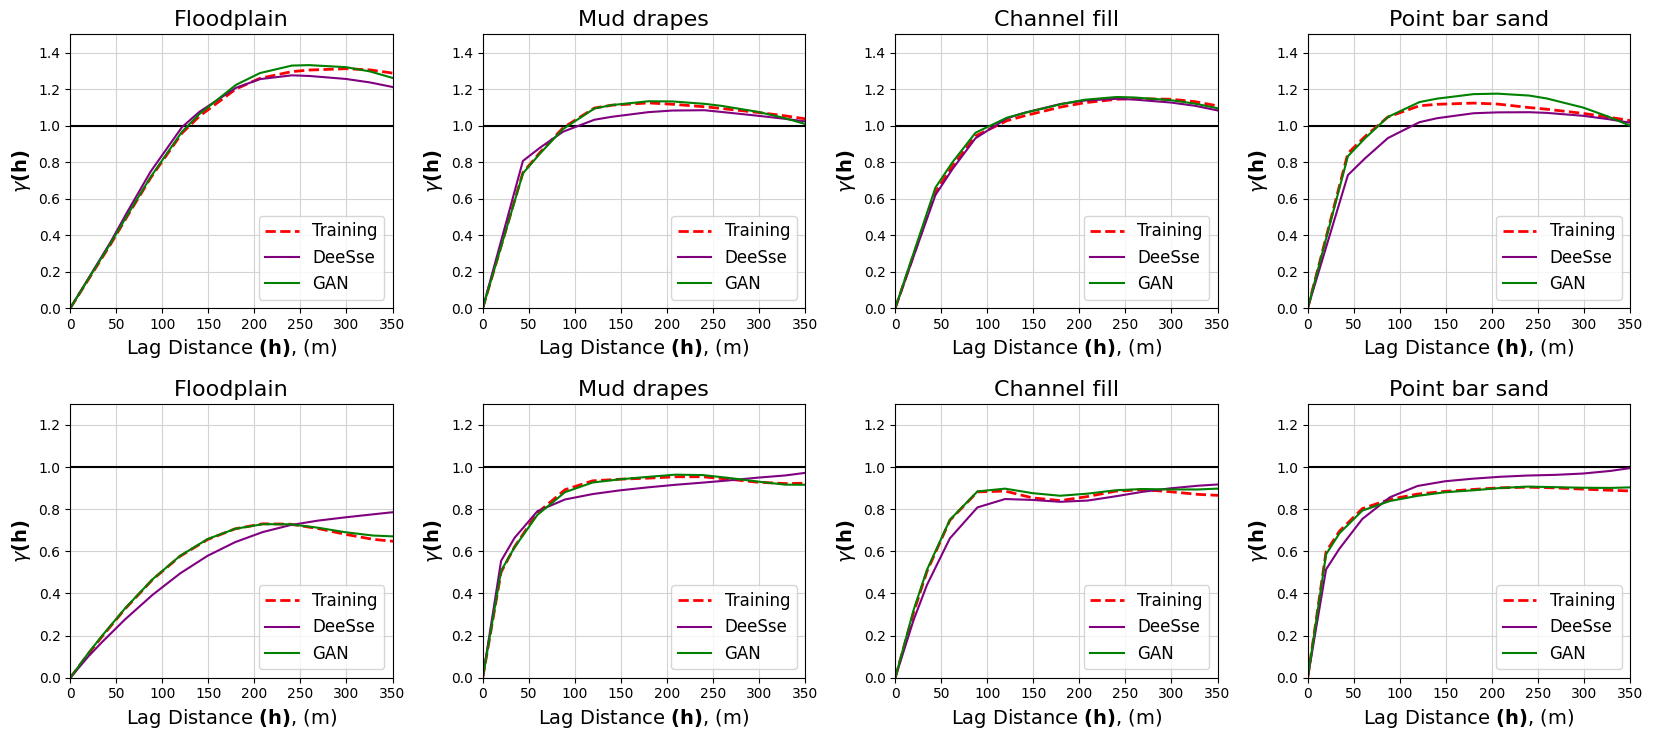

In [68]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(16.5, 7.5, forward=True)

tmin = -9999.; tmax = 9999.
lag_dist = 3.0; lag_tol = 3.0; nlag = 20;
bandh = 3.0; atol = 45
isill = 1                                               # standardize sill 
azi_mat = [0,90]           # directions in azimuth to consider


# Floodplain in Direction 0
# Training data
df = df_training_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(2,4,1)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Floodplain', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data
df = TraGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data
df = ProGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)   
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Mud drapes in Direction 0
# Training data
df = df_training_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(2,4,2)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Mud drapes', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data muddy drapes facie in direction 0
df = TraGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data muddy drapes
df = ProGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Channel fill facies in direction 0
# Training data
df = df_training_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(2,4,3)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Channel fill', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data
df = TraGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill) 
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data
df = ProGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)   
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Point bar sand in Direction 0
# Training data
df = df_training_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));  
plt.subplot(2,4,4)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Point bar sand', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.5])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill) 
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data Point bar sand facies in direction 0
df = TraGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data point bar sand facie in direction 0
df = ProGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[0],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Floodplain facies in direction 90
df = df_training_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(2,4,5)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Floodplain', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data
df = TraGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
plt.subplot(2,4,5)
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data
df = ProGAN_df_ns_BackgroundMudFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Mud drapes facies in direction 90
# Training data
df = df_training_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(2,4,6)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Mud drapes', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data
df = TraGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data muddy drapes facie in direction 90
df = ProGAN_df_ns_MuddyDrapesFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Channel fill facies in direction 90
df = df_training_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(2,4,7)
plt.plot([0,1000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Channel fill', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2,color = 'red', label='Training')
# MPS generated data channel sand facie in direction 90
df = TraGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data channel sand facie in direction 90
df = ProGAN_df_ns_ChannelSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


# Piont bar sand facies in direction 90
# Training data
df = df_training_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));    
plt.subplot(2,4,8)
plt.plot([0,1000],[1.0,1.0],linewidth=1.5,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)', fontsize=14)
plt.ylabel(r'$\gamma \bf(h)$', fontsize=14)
plt.title('Point bar sand', fontsize=16)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.grid(True, color='lightgrey')
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)  
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='--',linewidth=2.0,color = 'red', label='Training')
# MPS generated data
df = TraGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'purple', label='DeeSse')
# GAN generated data
df = ProGAN_df_ns_PointBarSandFacie.iloc[::4,:]
img_num = df.shape[1] - 2
lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));
for img in range(img_num):
    lag[img, 0,:], gamma[img, 0,:], npp[img, 0,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[1],atol,bandh,isill)
plt.plot(lag[img, 0,:-1]*10,np.mean(gamma[:, 0,:-1], axis = 0), linestyle='solid',linewidth=1.5,color = 'green', label='GAN')
plt.legend(fontsize='large',loc='lower right')


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.28, hspace=0.35)

plt.savefig('H:/02Article/004MudDrapesModeling(WRR)/010MajorRevision/图件/010VariogramModels/UnconditioanlMDS_plot_mean.svg' , dpi=300)

In [57]:
lag.shape

(200, 2, 22)

In [56]:
img

199